# COGS 108 - Final Project: To Live Another Day

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In our project, we discuss whether or not ride-sharing apps have made an impact on the number of total vehicle accidents related to alcohol. Our team believes that it would seem intuitive to see a decrease in total alcohol-related accidents, however, we are not completely sure as to what to expect from our data because it is from a small sample of states. Using data given from the US Department of Transportation, we proceed to do an exploratory data analysis of older and more recent data to compare how the rise in fame and popularity of the ride-sharing apps corresponds to the rise or drop of alcohol-related incidents, or rather, drunk driving accidents. Surprisingly however, we discovered that drunk driving accidents did not drop, but actually increased in the later 2010s relative to the early 2010s. 

# Names

- Pedro Diaz
- Omar Bautista
- Hanna Clemente
- Enrique Alvarado


<a id='research_question'></a>
# Research Question

Between the 4 most populated states, how has the introduction of ride-sharing apps, affected the number of DUI-related incidents or crashes?

<a id='background'></a>

## Background & Prior Work

Driving while under the influence has always been a problem, and society essentially just developed the practice of always having a designated driver. Sure, you could call a taxi, but taxis were hardly a pleasant experience for most people, were usually very expensive, and not widely available in many areas. What happens, however, when you always have a designated driver on standby? That’s what the introduction of Uber and other ride-sharing apps did. Researchers from The University of Texas Health Science Center have conducted a study similar to this in Houston. They looked at DUI arrests and serious motor vehicle injuries from 2007 to 2019 as well as Uber’s own hourly rideshare data to see if Uber has made a difference in the occurrence of DUI arrests and fatalities and found that they did! DUI’s decreased across the board, collision traumas have decreased by 23.8% on Friday and Saturday nights for all ages, 38.9% for individuals under 30 years old, and impaired driving arrests decreased overall in areas where Uber was being utilized compared to those where they weren’t. 

References (include links):
- 1)https://medium.com/uber-under-the-hood/new-research-shows-ubers-role-in-reducing-drunk-driving-1df4bef36027 
- 2)https://www-fars.nhtsa.dot.gov/Crashes/CrashesAlcohol.aspx

# Hypothesis


With the growing prominence of ride-sharing apps such as Uber, we predict that the total amount of recorded DUI incidents among California, Texas, Florida, and New York will have decreased within the scope of 2016-2019, when Uber became more popular, compared to prior years of 2010-2013.  We assume that individuals would likely be less inclined to drive under the influence when apps like these provide safe and convenient transportation options at the click of a button. 

# Dataset(s)

Our data consists of 2 sets of timespans (2010-2013; 2016-2019) that record the total number of car crashes within the states of Texas, California, New York, and Florida. Within each dataset, the variables of importance are the crash type (Single-Vehicle or Multiple-Vehicle), which describes if multiple cars were involved in the crash or if it was a single car; the total number alcohol related incidents and their respective percentages compared to the total car crashes; and the time of day, which is separated into 8 3-hour time periods that cover the entire day. Each dataset (separated by year and state) includes 8 observations for each variable we use (separated by time of day), but they are subsets of the initial total number of car crashes, so we are only counting each time period as one observation and using the rest of the data for our descriptive analysis relating to the alcohol-related incidents. Across all datasets, we expect to have 256 total observations that we then clean and model to show the difference in alcohol-related crashes as Uber was barely starting up (2010-2013) and after it gained popularity and common use (2016-2019). This data was collected from a public website available through the US Department of Transportation which is linked as a reference.

- Link to the main dataset database:https://www-fars.nhtsa.dot.gov/Crashes/CrashesAlcohol.aspx
- Number of observations: 256


# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

Our data consists of 2 sets of timespans (2010-2013; 2016-2019) that record the total number of car crashes within the states of Texas, California, New York, and Florida. Within each dataset, the variables of importance are the crash type (Single-Vehicle or Multiple-Vehicle), which describes if multiple cars were involved in the crash or if it was a single car; the total number alcohol related incidents and their respective percentages compared to the total car crashes; and the time of day, which is separated into 8 3-hour time periods that cover the entire day The data cleaning process was necessary to isolate these variables and remove any null values. To do so, we added more understandable labels and dropped the unnecessary rows and columns, and those with any null or NaN values. We also renamed each row of the Time Frame column to be more legible and converted these into strings. Lastly, we converted the data into floats to make it more malleable for analysis. The standardizing function to carry out these steps was applied to each dataset. 

Each dataset (separated by year and state) includes 8 observations for each variable we use (separated by time of day), but they are subsets of the initial total number of car crashes, so we are only counting each time period as one observation and using the rest of the data for our descriptive analysis relating to the alcohol-related incidents. 

Across all datasets, we expect to have 256 total observations that we then clean and model to show the difference in alcohol-related crashes as Uber was barely starting up (2010-2013) and after it gained popularity and common use (2016-2019).  This data was collected from a public website available through the US Department of Transportation which is linked as a reference.

### Imported Datasets

In [2]:
#New York datasets
NY_2010 = pd.read_csv('NY_2010.csv')
NY_2011 = pd.read_csv('NY_2011.csv')
NY_2012 = pd.read_csv('NY_2012.csv')
NY_2013 = pd.read_csv('NY_2013.csv')
NY_2016 = pd.read_csv('NY_2016.csv')
NY_2017 = pd.read_csv('NY_2017.csv')
NY_2018 = pd.read_csv('NY_2018.csv')
NY_2019 = pd.read_csv('NY_2019.csv')

#California datasets
CA_2010 = pd.read_csv('CA_2010.csv')
CA_2011 = pd.read_csv('CA_2011.csv')
CA_2012 = pd.read_csv('CA_2012.csv')
CA_2013 = pd.read_csv('CA_2013.csv')
CA_2016 = pd.read_csv('CA_2016.csv')
CA_2017 = pd.read_csv('CA_2017.csv')
CA_2018 = pd.read_csv('CA_2018.csv')
CA_2019 = pd.read_csv('CA_2019.csv')

#Florida datasets
FL_2010 = pd.read_csv('FL_2010.csv')
FL_2011 = pd.read_csv('FL_2011.csv')
FL_2012 = pd.read_csv('FL_2012.csv')
FL_2013 = pd.read_csv('FL_2013.csv')
FL_2016 = pd.read_csv('FL_2016.csv')
FL_2017 = pd.read_csv('FL_2017.csv')
FL_2018 = pd.read_csv('FL_2018.csv')
FL_2019 = pd.read_csv('FL_2019.csv')

#Texas datasets
TX_2010 = pd.read_csv('TX_2010.csv')
TX_2011 = pd.read_csv('TX_2011.csv')
TX_2012 = pd.read_csv('TX_2012.csv')
TX_2013 = pd.read_csv('TX_2013.csv')
TX_2016 = pd.read_csv('TX_2016.csv')
TX_2017 = pd.read_csv('TX_2017.csv')
TX_2018 = pd.read_csv('TX_2018.csv')
TX_2019 = pd.read_csv('TX_2019.csv')

### Function for Data Cleaning

In [3]:
def standardize_state_DUI_data (dataframe):
    
    '''
    This function adds labels to our relevant columns, drops unnecessary and columns rows 
    (including those with null values), and then resets the index to make the dataframe clean and 
    tidy.
    '''
    
    '''
    This section renames the columns, drops the unnecessary rows and NaNs, resets the index to 
    be in sequential order, and drops the unnecessary columns.
    '''
    dataframe.columns= ['Time Frame', 'Single Vehicles', 'Alcohol Related' , 'Alcohol Percentage', 'Multiple Vehicles','Alcohol Related', 'Alcohol Percentage' ,'Total Vehicles' ,'Total Alcohol Related', 'Total Alcohol Percentage']
    dataframe= dataframe.drop([0, 1, 2])
    dataframe= dataframe.dropna()
    dataframe= dataframe.reset_index()
    dataframe= dataframe.drop(columns= ['index', 'Single Vehicles', 'Alcohol Related' , 'Alcohol Percentage', 'Multiple Vehicles','Alcohol Related', 'Alcohol Percentage' ])
    
    "Makes the 'Time Frame' column look a bit more legible"
    dataframe.at[0,'Time Frame'] = '12:00 am - 3:00 am'
    dataframe.at[1,'Time Frame'] = '3:00 am - 6:00 am'
    dataframe.at[2,'Time Frame'] = '6:00 am - 9:00 am'
    dataframe.at[3,'Time Frame'] = '9:00 am - 12:00 pm'
    dataframe.at[4,'Time Frame'] = '12:00 pm - 3:00 pm'
    dataframe.at[5,'Time Frame'] = '3:00 pm - 6:00 pm'
    dataframe.at[6,'Time Frame'] = '6:00 pm - 9:00 pm'
    dataframe.at[7,'Time Frame'] = '9:00 pm - 12:00 am'
    
    "Makes the data columns into floats and the 'Time Frame' column into strings"
    col1= dataframe['Total Vehicles'].astype('float')
    dataframe['Total Vehicles']= col1
    col1= dataframe['Total Alcohol Related'].astype('float')
    dataframe['Total Alcohol Related']= col1
    col1= dataframe['Total Alcohol Percentage'].astype('float')
    dataframe['Total Alcohol Percentage']= col1
    col1= dataframe['Time Frame'].astype('string')
    dataframe['Time Frame']= col1
    
    return dataframe

### New York Data Cleaning

In [4]:
df_NY_2010 = standardize_state_DUI_data(NY_2010)
df_NY_2011 = standardize_state_DUI_data(NY_2011)
df_NY_2012 = standardize_state_DUI_data(NY_2012)
df_NY_2013 = standardize_state_DUI_data(NY_2013)
df_NY_2016 = standardize_state_DUI_data(NY_2016)
df_NY_2017 = standardize_state_DUI_data(NY_2017)
df_NY_2018 = standardize_state_DUI_data(NY_2018)
df_NY_2019 = standardize_state_DUI_data(NY_2019)

In [5]:
df_NY_2010_TOD= df_NY_2010.drop(labels= 8)
df_NY_2011_TOD= df_NY_2011.drop(labels= 8)
df_NY_2012_TOD= df_NY_2012.drop(labels= 8)
df_NY_2013_TOD= df_NY_2013.drop(labels= 8)
df_NY_2016_TOD= df_NY_2016.drop(labels= 8)
df_NY_2017_TOD= df_NY_2017.drop(labels= 8)
df_NY_2018_TOD= df_NY_2018.drop(labels= 8)
df_NY_2019_TOD= df_NY_2019.drop(labels= 8)

In [6]:
df_NY10_13= pd.concat([df_NY_2010, df_NY_2011, df_NY_2012, df_NY_2013], axis = 0)
df_NY_totals10_13= df_NY10_13.loc[df_NY10_13['Time Frame'] == 'Total']
df_NY_totals10_13= df_NY_totals10_13.drop(columns= 'Time Frame')
df_NY_totals10_13= df_NY_totals10_13.reset_index()
df_NY_totals10_13= df_NY_totals10_13.rename({'index' : 'Years'})
df_NY_totals10_13= df_NY_totals10_13.rename(index= {0:'2010', 1:'2011', 2:'2012', 3:'2013'})
df_NY_totals10_13= df_NY_totals10_13.drop(columns= 'index')


df_NY16_19= pd.concat([df_NY_2016, df_NY_2017, df_NY_2018, df_NY_2019], axis = 0)
df_NY_totals16_19= df_NY16_19.loc[df_NY16_19['Time Frame'] == 'Total']
df_NY_totals16_19= df_NY_totals16_19.drop(columns= 'Time Frame')
df_NY_totals16_19= df_NY_totals16_19.reset_index()
df_NY_totals16_19= df_NY_totals16_19.rename({'index' : 'Years'})
df_NY_totals16_19= df_NY_totals16_19.rename(index= {0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_NY_totals16_19= df_NY_totals16_19.drop(columns= 'index')


In [7]:
df_NY10_13= df_NY10_13.reset_index()
df_NY10_13= df_NY10_13.drop(columns= ['index'])
df_NY10_13_TOD= df_NY10_13.drop(labels= [8, 17, 26, 35])
df_NY10_13_TOD= df_NY10_13_TOD.reset_index()
df_NY10_13_TOD= df_NY10_13_TOD.drop(columns= 'index')

df_NY16_19= df_NY16_19.reset_index()
df_NY16_19= df_NY16_19.drop(columns= ['index'])
df_NY16_19_TOD= df_NY16_19.drop(labels= [8, 17, 26, 35])
df_NY16_19_TOD= df_NY16_19_TOD.reset_index()
df_NY16_19_TOD= df_NY16_19_TOD.drop(columns= 'index')
df_NY16_19_TOD

,Time Frame,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,12:00 am - 3:00 am,86.0,45.0,52.0
1,3:00 am - 6:00 am,97.0,48.0,50.0
2,6:00 am - 9:00 am,107.0,15.0,14.0
3,9:00 am - 12:00 pm,123.0,12.0,10.0
4,12:00 pm - 3:00 pm,119.0,16.0,13.0
5,3:00 pm - 6:00 pm,153.0,34.0,22.0
6,6:00 pm - 9:00 pm,154.0,44.0,29.0
7,9:00 pm - 12:00 am,140.0,56.0,40.0
8,12:00 am - 3:00 am,93.0,50.0,53.0
9,3:00 am - 6:00 am,75.0,36.0,48.0


### California Data Cleaning

In [8]:
df_CA_2010 = standardize_state_DUI_data(CA_2010)
df_CA_2011 = standardize_state_DUI_data(CA_2011)
df_CA_2012 = standardize_state_DUI_data(CA_2012)
df_CA_2013 = standardize_state_DUI_data(CA_2013)
df_CA_2016 = standardize_state_DUI_data(CA_2016)
df_CA_2017 = standardize_state_DUI_data(CA_2017)
df_CA_2018 = standardize_state_DUI_data(CA_2018)
df_CA_2019 = standardize_state_DUI_data(CA_2019)

In [9]:
df_CA_2010_TOD= df_CA_2010.drop(labels= 8)
df_CA_2011_TOD= df_CA_2011.drop(labels= 8)
df_CA_2012_TOD= df_CA_2012.drop(labels= 8)
df_CA_2013_TOD= df_CA_2013.drop(labels= 8)
df_CA_2016_TOD= df_CA_2016.drop(labels= 8)
df_CA_2017_TOD= df_CA_2017.drop(labels= 8)
df_CA_2018_TOD= df_CA_2018.drop(labels= 8)
df_CA_2019_TOD= df_CA_2019.drop(labels= 8)

In [10]:
df_CA10_13= pd.concat([df_CA_2010, df_CA_2011, df_CA_2012, df_CA_2013], axis = 0)
df_CA_totals10_13= df_CA10_13.loc[df_CA10_13['Time Frame'] == 'Total']
df_CA_totals10_13= df_CA_totals10_13.drop(columns= 'Time Frame')
df_CA_totals10_13= df_CA_totals10_13.reset_index()
df_CA_totals10_13= df_CA_totals10_13.rename({'index' : 'Years'})
df_CA_totals10_13= df_CA_totals10_13.rename(index= {0:'2010', 1:'2011', 2:'2012', 3:'2013'})
df_CA_totals10_13= df_CA_totals10_13.drop(columns= 'index')


df_CA16_19= pd.concat([df_CA_2016, df_CA_2017, df_CA_2018, df_CA_2019], axis = 0)
df_CA_totals16_19= df_CA16_19.loc[df_CA16_19['Time Frame'] == 'Total']
df_CA_totals16_19= df_CA_totals16_19.drop(columns= 'Time Frame')
df_CA_totals16_19= df_CA_totals16_19.reset_index()
df_CA_totals16_19= df_CA_totals16_19.rename({'index' : 'Years'})
df_CA_totals16_19= df_CA_totals16_19.rename(index= {0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_CA_totals16_19= df_CA_totals16_19.drop(columns= 'index')
df_CA_totals16_19

,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
2016,3540.0,996.0,28.0
2017,3569.0,1024.0,29.0
2018,3485.0,999.0,29.0
2019,3316.0,851.0,26.0


In [11]:
df_CA10_13= df_CA10_13.reset_index()
df_CA10_13= df_CA10_13.drop(columns= ['index'])
df_CA10_13_TOD= df_CA10_13.drop(labels= [8, 17, 26, 35])
df_CA10_13_TOD= df_CA10_13_TOD.reset_index()
df_CA10_13_TOD= df_CA10_13_TOD.drop(columns= 'index')

df_CA16_19= df_CA16_19.reset_index()
df_CA16_19= df_CA16_19.drop(columns= ['index'])
df_CA16_19_TOD= df_CA16_19.drop(labels= [8, 17, 26, 35])
df_CA16_19_TOD= df_CA16_19_TOD.reset_index()
df_CA16_19_TOD= df_CA16_19_TOD.drop(columns= 'index')
df_CA16_19_TOD

,Time Frame,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,12:00 am - 3:00 am,498.0,258.0,52.0
1,3:00 am - 6:00 am,346.0,119.0,34.0
2,6:00 am - 9:00 am,317.0,29.0,9.0
3,9:00 am - 12:00 pm,296.0,28.0,10.0
4,12:00 pm - 3:00 pm,362.0,46.0,13.0
5,3:00 pm - 6:00 pm,504.0,103.0,20.0
6,6:00 pm - 9:00 pm,644.0,183.0,28.0
7,9:00 pm - 12:00 am,517.0,210.0,41.0
8,12:00 am - 3:00 am,418.0,229.0,55.0
9,3:00 am - 6:00 am,385.0,128.0,33.0


### Florida Data Cleaning

In [12]:
df_FL_2010 = standardize_state_DUI_data(FL_2010)
df_FL_2011 = standardize_state_DUI_data(FL_2011)
df_FL_2012 = standardize_state_DUI_data(FL_2012)
df_FL_2013 = standardize_state_DUI_data(FL_2013)
df_FL_2016 = standardize_state_DUI_data(FL_2016)
df_FL_2017 = standardize_state_DUI_data(FL_2017)
df_FL_2018 = standardize_state_DUI_data(FL_2018)
df_FL_2019 = standardize_state_DUI_data(FL_2019)

In [13]:
df_FL_2010_TOD= df_FL_2010.drop(labels= 8)
df_FL_2011_TOD= df_FL_2011.drop(labels= 8)
df_FL_2012_TOD= df_FL_2012.drop(labels= 8)
df_FL_2013_TOD= df_FL_2013.drop(labels= 8)
df_FL_2016_TOD= df_FL_2016.drop(labels= 8)
df_FL_2017_TOD= df_FL_2017.drop(labels= 8)
df_FL_2018_TOD= df_FL_2018.drop(labels= 8)
df_FL_2019_TOD= df_FL_2019.drop(labels= 8)

In [14]:
df_FL10_13= pd.concat([df_FL_2010, df_FL_2011, df_FL_2012, df_FL_2013], axis = 0)
df_FL_totals10_13= df_FL10_13.loc[df_FL10_13['Time Frame'] == 'Total']
df_FL_totals10_13= df_FL_totals10_13.drop(columns= 'Time Frame')
df_FL_totals10_13= df_FL_totals10_13.reset_index()
df_FL_totals10_13= df_FL_totals10_13.rename({'index' : 'Years'})
df_FL_totals10_13= df_FL_totals10_13.rename(index= {0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_FL_totals10_13= df_FL_totals10_13.drop(columns= 'index')


df_FL16_19= pd.concat([df_FL_2016, df_FL_2017, df_FL_2018, df_FL_2019], axis = 0)
df_FL_totals16_19= df_FL16_19.loc[df_FL16_19['Time Frame'] == 'Total']
df_FL_totals16_19= df_FL_totals16_19.drop(columns= 'Time Frame')
df_FL_totals16_19= df_FL_totals16_19.reset_index()
df_FL_totals16_19= df_FL_totals16_19.rename({'index' : 'Years'})
df_FL_totals16_19= df_FL_totals16_19.rename(index= {0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_FL_totals16_19= df_FL_totals16_19.drop(columns= 'index')

df_FL_totals16_19

,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
2016,2935.0,809.0,28.0
2017,2925.0,772.0,26.0
2018,2917.0,751.0,26.0
2019,2950.0,717.0,24.0


In [15]:
df_FL10_13= df_FL10_13.reset_index()
df_FL10_13= df_FL10_13.drop(columns= ['index'])
df_FL10_13_TOD= df_FL10_13.drop(labels= [8, 17, 26, 27, 36])
df_FL10_13_TOD= df_FL10_13_TOD.reset_index()
df_FL10_13_TOD= df_FL10_13_TOD.drop(columns= 'index')


df_FL16_19= df_FL16_19.reset_index()
df_FL16_19= df_FL16_19.drop(columns= ['index'])
df_FL16_19_TOD= df_FL16_19.drop(labels= [8, 17, 26, 35])
df_FL16_19_TOD= df_FL16_19_TOD.reset_index()
df_FL16_19_TOD= df_FL16_19_TOD.drop(columns= 'index')



df_FL16_19_TOD

,Time Frame,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,12:00 am - 3:00 am,386.0,214.0,56.0
1,3:00 am - 6:00 am,308.0,135.0,44.0
2,6:00 am - 9:00 am,286.0,25.0,9.0
3,9:00 am - 12:00 pm,253.0,19.0,7.0
4,12:00 pm - 3:00 pm,276.0,29.0,11.0
5,3:00 pm - 6:00 pm,366.0,67.0,18.0
6,6:00 pm - 9:00 pm,528.0,136.0,26.0
7,9:00 pm - 12:00 am,531.0,183.0,34.0
8,12:00 am - 3:00 am,373.0,196.0,53.0
9,3:00 am - 6:00 am,248.0,95.0,38.0


### Texas Data Cleaning

In [16]:
df_TX_2010 = standardize_state_DUI_data(TX_2010)
df_TX_2011 = standardize_state_DUI_data(TX_2011)
df_TX_2012 = standardize_state_DUI_data(TX_2012)
df_TX_2013 = standardize_state_DUI_data(TX_2013)
df_TX_2016 = standardize_state_DUI_data(TX_2016)
df_TX_2017 = standardize_state_DUI_data(TX_2017)
df_TX_2018 = standardize_state_DUI_data(TX_2018)
df_TX_2019 = standardize_state_DUI_data(TX_2019)

In [17]:
df_TX_2010_TOD = TX_2010.drop(labels= 8)
df_TX_2011_TOD = TX_2011.drop(labels= 8)
df_TX_2012_TOD = TX_2012.drop(labels= 8)
df_TX_2013_TOD = TX_2013.drop(labels= 8)
df_TX_2016_TOD = TX_2016.drop(labels= 8)
df_TX_2017_TOD = TX_2017.drop(labels= 8)
df_TX_2018_TOD = TX_2018.drop(labels= 8)
df_TX_2019_TOD = TX_2019.drop(labels= 8)

In [18]:
df_TX10_13= pd.concat([df_TX_2010, df_TX_2011, df_TX_2012, df_TX_2013], axis = 0)
df_TX_totals10_13= df_TX10_13.loc[df_TX10_13['Time Frame'] == 'Total']
df_TX_totals10_13= df_TX_totals10_13.drop(columns= 'Time Frame')
df_TX_totals10_13= df_TX_totals10_13.reset_index()
df_TX_totals10_13= df_TX_totals10_13.rename({'index' : 'Years'})
df_TX_totals10_13= df_TX_totals10_13.rename(index= {0:'2010', 1:'2011', 2:'2012', 3:'2013'})
df_TX_totals10_13= df_TX_totals10_13.drop(columns= 'index')


df_TX16_19= pd.concat([df_TX_2016, df_TX_2017, df_TX_2018, df_TX_2019], axis = 0)
df_TX_totals16_19= df_TX16_19.loc[df_TX16_19['Time Frame'] == 'Total']
df_TX_totals16_19= df_TX_totals16_19.drop(columns= 'Time Frame')
df_TX_totals16_19= df_TX_totals16_19.reset_index()
df_TX_totals16_19= df_TX_totals16_19.rename({'index' : 'Years'})
df_TX_totals16_19= df_TX_totals16_19.rename(index= {0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_TX_totals16_19= df_TX_totals16_19.drop(columns= 'index')
df_TX_totals10_13

,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
2010,2746.0,1151.0,42.0
2011,2790.0,1113.0,40.0
2012,3033.0,1132.0,37.0
2013,3047.0,1192.0,39.0


In [19]:
df_TX10_13= df_TX10_13.reset_index()
df_TX10_13= df_TX10_13.drop(columns= ['index'])
df_TX10_13_TOD= df_TX10_13.drop(labels= [8, 17, 26, 35])
df_TX10_13_TOD= df_TX10_13_TOD.reset_index()
df_TX10_13_TOD= df_TX10_13_TOD.drop(columns= 'index')


df_TX16_19= df_TX16_19.reset_index()
df_TX16_19= df_TX16_19.drop(columns= ['index'])
df_TX16_19_TOD= df_TX16_19.drop(labels= [8, 17, 26, 35])
df_TX16_19_TOD= df_TX16_19_TOD.reset_index()
df_TX16_19_TOD= df_TX16_19_TOD.drop(columns= 'index')

df_TX16_19_TOD

,Time Frame,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,12:00 am - 3:00 am,513.0,324.0,63.0
1,3:00 am - 6:00 am,362.0,192.0,53.0
2,6:00 am - 9:00 am,355.0,77.0,22.0
3,9:00 am - 12:00 pm,288.0,47.0,16.0
4,12:00 pm - 3:00 pm,404.0,71.0,18.0
5,3:00 pm - 6:00 pm,417.0,125.0,30.0
6,6:00 pm - 9:00 pm,539.0,225.0,42.0
7,9:00 pm - 12:00 am,549.0,278.0,51.0
8,12:00 am - 3:00 am,463.0,291.0,63.0
9,3:00 am - 6:00 am,294.0,158.0,54.0


# EDA 

## Structure

In [37]:
CA_2010.head()

,Time Frame,Single Vehicles,Alcohol Related,Alcohol Percentage,Multiple Vehicles,Alcohol Related,Alcohol Percentage,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,NaN,Single Vehicle,NaN,NaN,Multiple Vehicles,NaN,NaN,Total,NaN,NaN
1,FieldDesc,Number,Alcohol--Related,Percent Alcohol--Related,Number1,Alcohol--Related1,Percent Alcohol--Related1,Number2,Alcohol--Related2,Percent Alcohol--Related2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Midnight to 2:59 a.m.,244,152,62,93,56,60,337,208,62
4,3 a.m. to 5:59 a.m.,177,61,34,57,21,37,234,82,35


In [38]:
CA_2010.shape

(13, 10)

In [39]:
CA_2010.dtypes

Time Frame                  object
Single Vehicles             object
Alcohol Related             object
Alcohol Percentage          object
Multiple Vehicles           object
Alcohol Related             object
Alcohol Percentage          object
Total Vehicles              object
Total Alcohol Related       object
Total Alcohol Percentage    object
dtype: object

The format of the data is tabular. The data was orginally in excel format, but for ease of use we reformated the data beforehand to csv and then read them all into our notebooks. All of our datasets have their observations in seperate rows. We have ten columns that we have information about.
* The 'Time Frame' column has information about what time of day that the accident took place in.
* The 'Single Vehicles' column gives us the accidents that happened that only involved one car
* The 'Alcohol Related' column gives us the amount of Single Vehicles accidents where the drivers were under the influence
* The 'Alcohol Percentage' column gives is the percentage of accidents that were alcohol related compared to the total number of accidents
* The 'Multiple Vehicles' column gives the accidents that heppened where multiple vehicles were involved
* The second 'Alcohol Related' columns gives us the amount of 'Multiple Vehicles' accidents where one of the drivers was under the influence
* The second 'Alcohol Percentage' column gives is the percentage of accidents that were alcohol related compared to the total number of accidents for the 'Multiple Vehicles' column
* The 'Total Vehicles' column looks at the total accidents that took place that year in the given state for each Time Frame
* The 'Total Alcohol Related' column gives us the accidents from Total Vehicles where the drivers were under the influence
* The 'Total Alcohol Percentage' column gives us the percent total amount of alocohol related accidents when compared to the tootal amount of accidents

The data was originally stored as objects in every column, so we had to convert them to strings and floats where it was appropriate. The data has been spread across 32 datasets. There's eight datasets for each state we wanted to look at, divided into four datasets for each timeframe. The datasets were concatenated with their similar counterparts when the need arose (i.e. the datasets pertaining to each time frame were combined, as well as the same state at times). 

## Granularity

In [40]:
NY_2010.head()

,Time Frame,Single Vehicles,Alcohol Related,Alcohol Percentage,Multiple Vehicles,Alcohol Related,Alcohol Percentage,Total Vehicles,Total Alcohol Related,Total Alcohol Percentage
0,NaN,Single Vehicle,NaN,NaN,Multiple Vehicles,NaN,NaN,Total,NaN,NaN
1,FieldDesc,Number,Alcohol--Related,Percent Alcohol--Related,Number1,Alcohol--Related1,Percent Alcohol--Related1,Number2,Alcohol--Related2,Percent Alcohol--Related2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Midnight to 2:59 a.m.,98,63,64,16,10,63,114,73,64
4,3 a.m. to 5:59 a.m.,72,41,57,17,10,58,89,51,57


Every row of our datasets represents the amount of fatal car accidents during a certain time frame of the day and certain characteristics surrounding them. Every dataset has the same level of granularity, since every one was downloaded from the same source. The data has every observation that happened during each timeframe, so it wasnt aggregated at all. The data has a row at the end of every dataframe that gave us summary with the totals of each column.

## Scope

In [41]:
TX_2010.shape

(13, 10)

Our data had a few rows that we had to get rid of, mostly the first three rows since they only had labels that we could add in ourselves and a whole bunch of null values. here were a few datasets that would ocassionally have a row full of null values between the final time frame and the totals row. All of these nulls were in the same column, so we didnt have to sacrifice any real data when we romoved the nulls nor leave a placeholder. The data is useful to our hypothesis since it gives us fatality data surrounding drunk driving for a whole decade, although we only took the datasets that pertained to our eight years of interest.

## Temporality

The reported times of data represent the times during which accidents occured throughout the whole year. The times are represented in eight three hour blocks, starting and ending at midnight and being represented with the starting hour and up until right before the next hour block. If the block includes midnight, the word midnight is used for the time designation rather than 12:00 a.m. We don't plan to do any aggregations with the times, but we do plan on reformatting them by using 12:00 for midnight instead of midnight. The means nor the variance of the dataset changes as it goes on.

# Faithfulness

This data was collected by the United States Department of Transportation. Most of the values were reasonable, although we did not expect the values of the New York datasets to be so much lower than the other. The only inconsistencies we found across the different tables was that some of the datasets would occasionally have a row full of nulls that wasn't present in the other datasets. There was no data that was entered by hand or that had any signs of flasification across our datasets either.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

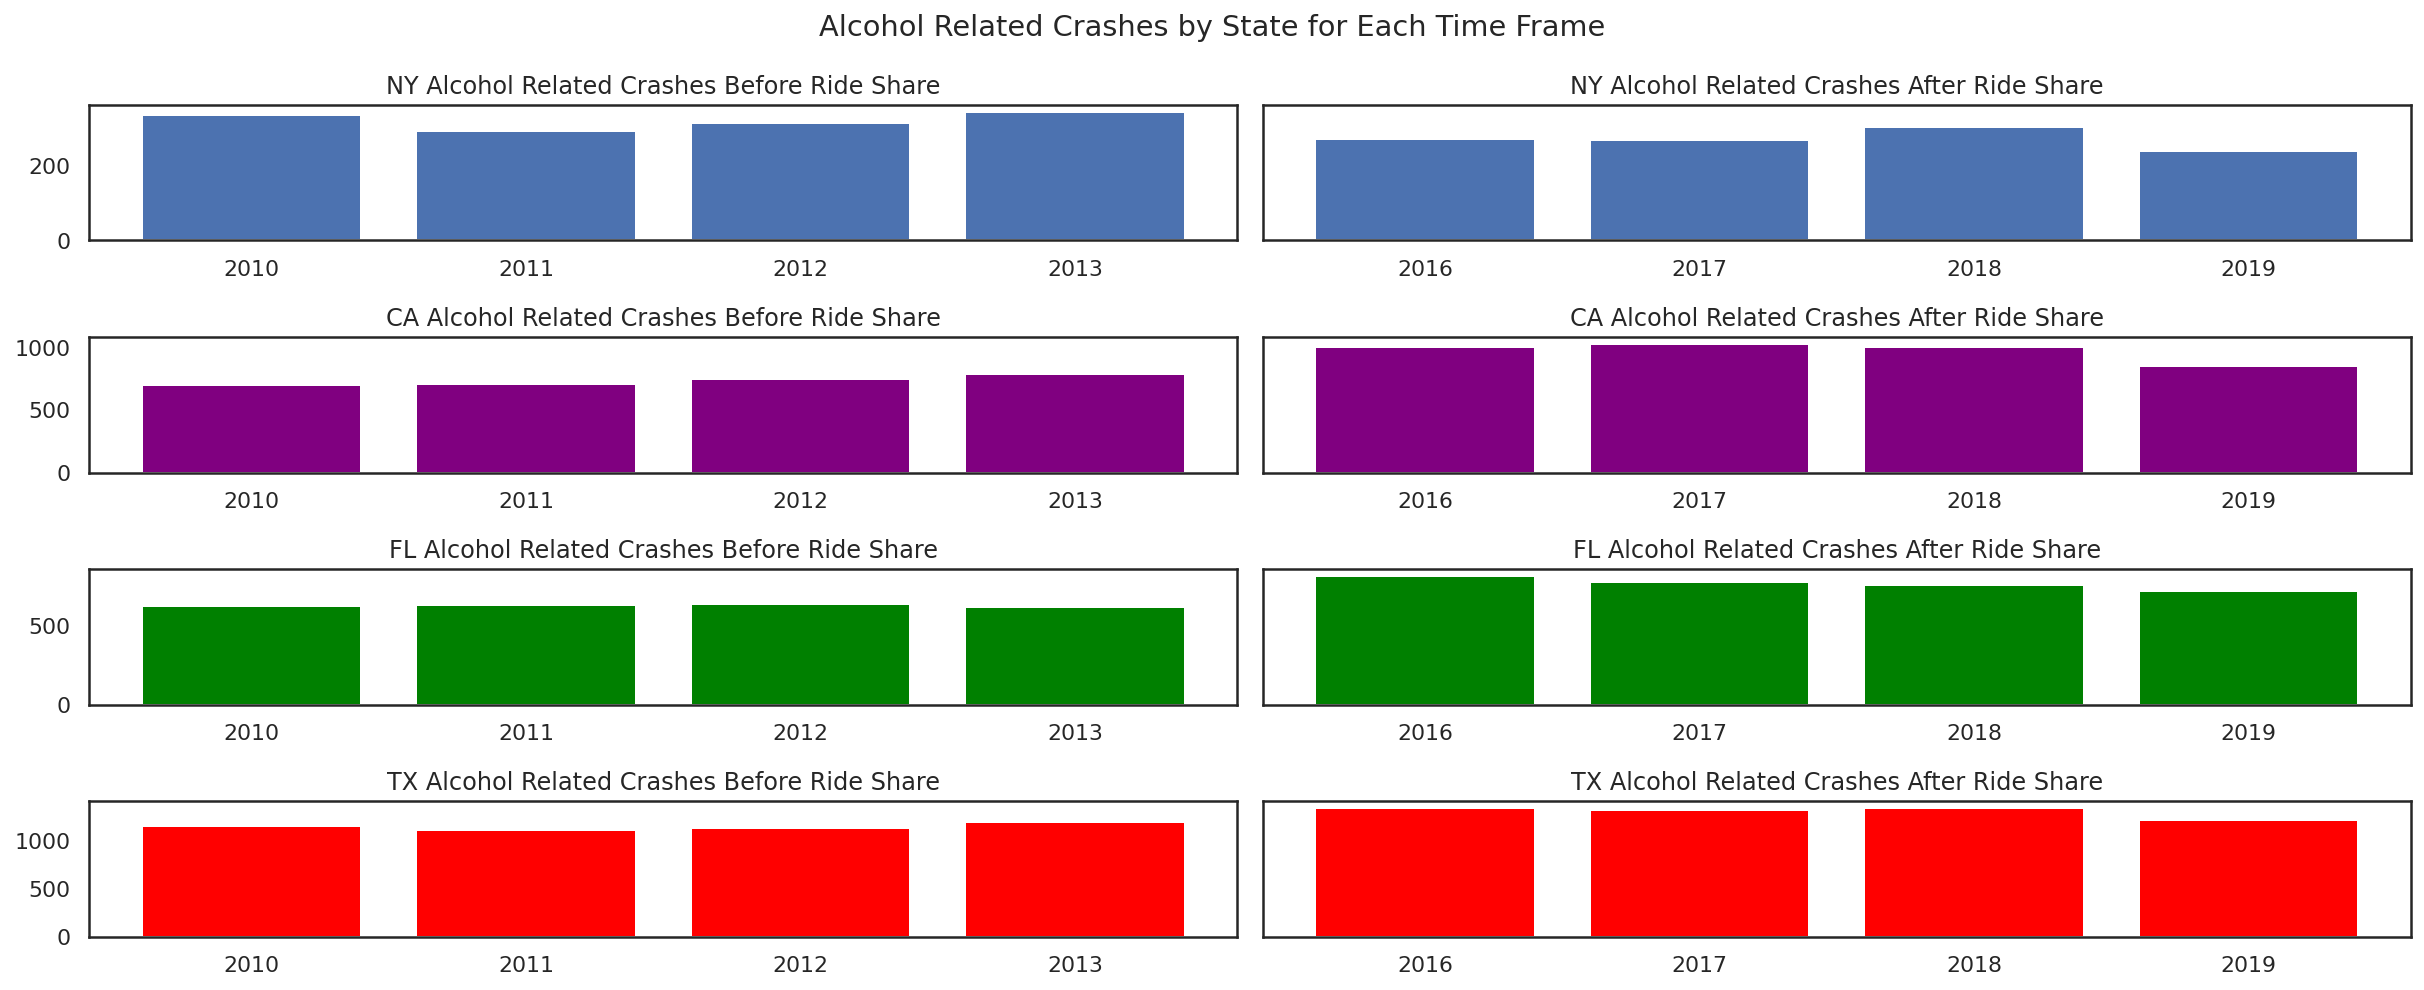

In [21]:
## YOUR CODE HERE

fig, axes= plt.subplots(nrows= 4, ncols= 2, sharey= 'row')
fig.suptitle('Alcohol Related Crashes by State for Each Time Frame')
x= ['2010', '2011', '2012', '2013']
x_2= ['2016', '2017', '2018', '2019']

axes[0,0].bar(x, height= df_NY_totals10_13['Total Alcohol Related'])
axes[0,0].set_title('NY Alcohol Related Crashes Before Ride Share')
axes[0,0].set_title('NY Alcohol Related Crashes Before Ride Share')


axes[0,1].bar(x_2, height= df_NY_totals16_19['Total Alcohol Related'])
axes[0,1].set_title('NY Alcohol Related Crashes After Ride Share')

axes[1,0].bar(x, height= df_CA_totals10_13['Total Alcohol Related'], color= 'purple')
axes[1,0].set_title('CA Alcohol Related Crashes Before Ride Share')

axes[1,1].bar(x_2, height= df_CA_totals16_19['Total Alcohol Related'], color= 'purple')
axes[1,1].set_title('CA Alcohol Related Crashes After Ride Share')

axes[2,0].bar(x, height= df_FL_totals10_13['Total Alcohol Related'], color= 'green')
axes[2,0].set_title('FL Alcohol Related Crashes Before Ride Share')

axes[2,1].bar(x_2, height= df_FL_totals16_19['Total Alcohol Related'], color= 'green')
axes[2,1].set_title('FL Alcohol Related Crashes After Ride Share')

axes[3,0].bar(x, height= df_TX_totals10_13['Total Alcohol Related'], color= 'red')
axes[3,0].set_title('TX Alcohol Related Crashes Before Ride Share')

axes[3,1].bar(x_2, height= df_TX_totals16_19['Total Alcohol Related'], color= 'red')
axes[3,1].set_title('TX Alcohol Related Crashes After Ride Share')

fig.tight_layout()
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

This visualization shows the total amount of alcohol related crashes for every year in each Time Frame. The graphs on the left show the total crashes that happened before ride shares became very prominent and the graphs on the right show the crashes that happened after. Looking and comparing the pairs of plots for state, it looks like the prominence of ride sharing actually caused an increase in the amount of drunk driving accidents rather than a decrease. This visualization proves the opposite of what our hypothesis predicted.

Text(0.5, 0.98, 'Total Drunk Driving Accidents')

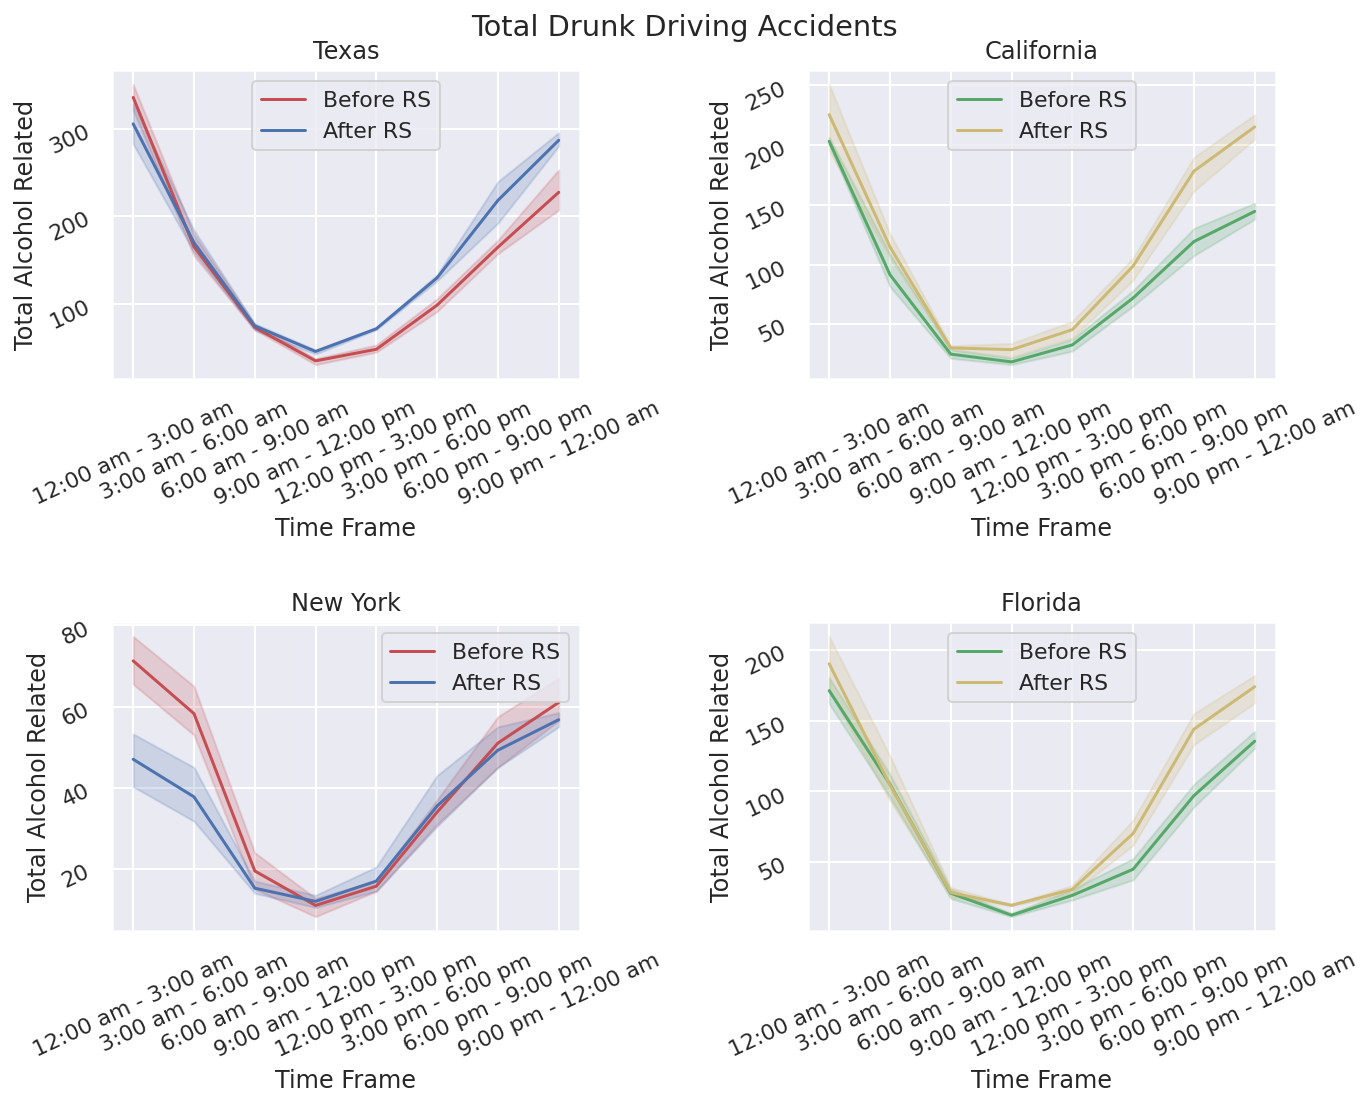

In [44]:
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 10, 8))
  
sns.lineplot( x = "Time Frame", y = "Total Alcohol Related", 
            color = 'r', data = df_TX10_13_TOD, label = 'Before RS',
             ax = ax[0][0], sizes = 5)
sns.lineplot( x = "Time Frame", y = "Total Alcohol Related", 
             color = 'b', data = df_TX16_19_TOD, label = 'After RS',
             ax = ax[0][0])
ax[0][0].set_title('Texas')

  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Time Frame", y = "Total Alcohol Related", 
             color = 'g', data = df_CA10_13_TOD, label = 'Before RS',
             ax = ax[0][1])
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Time Frame", y = "Total Alcohol Related", 
             color = 'y', data = df_CA16_19_TOD, label = 'After RS',
             ax = ax[0][1])
ax[0][1].set_title('California')

  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Time Frame", y = "Total Alcohol Related", 
             color = 'r', data = df_NY10_13_TOD, label = 'Before RS',
             ax = ax[1][0])
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Time Frame", y = "Total Alcohol Related", 
             color = 'b', data = df_NY16_19_TOD, label = 'After RS',
             ax = ax[1][0])
ax[1][0].set_title('New York')
    
    
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Time Frame", y = "Total Alcohol Related", 
             color = 'g', data = df_FL10_13_TOD, label = 'Before RS',
             ax = ax[1][1])
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Time Frame", y = "Total Alcohol Related", 
             color = 'y', data = df_FL16_19_TOD, label = 'After RS',
             ax = ax[1][1])
ax[1][1].set_title('Florida')
    
    
ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 2)

sns.set(font_scale = 1)
fig.suptitle('Total Drunk Driving Accidents')

This visualization was done to see when the most drunk driving accidents occurred. The data shows that the most accidents happened during the night hours. The conclusion we can draw from this graph is consistent with what we learned from our first visualization: the intorduction of ride sharing has actually increaed the number of drunk driving incidents.

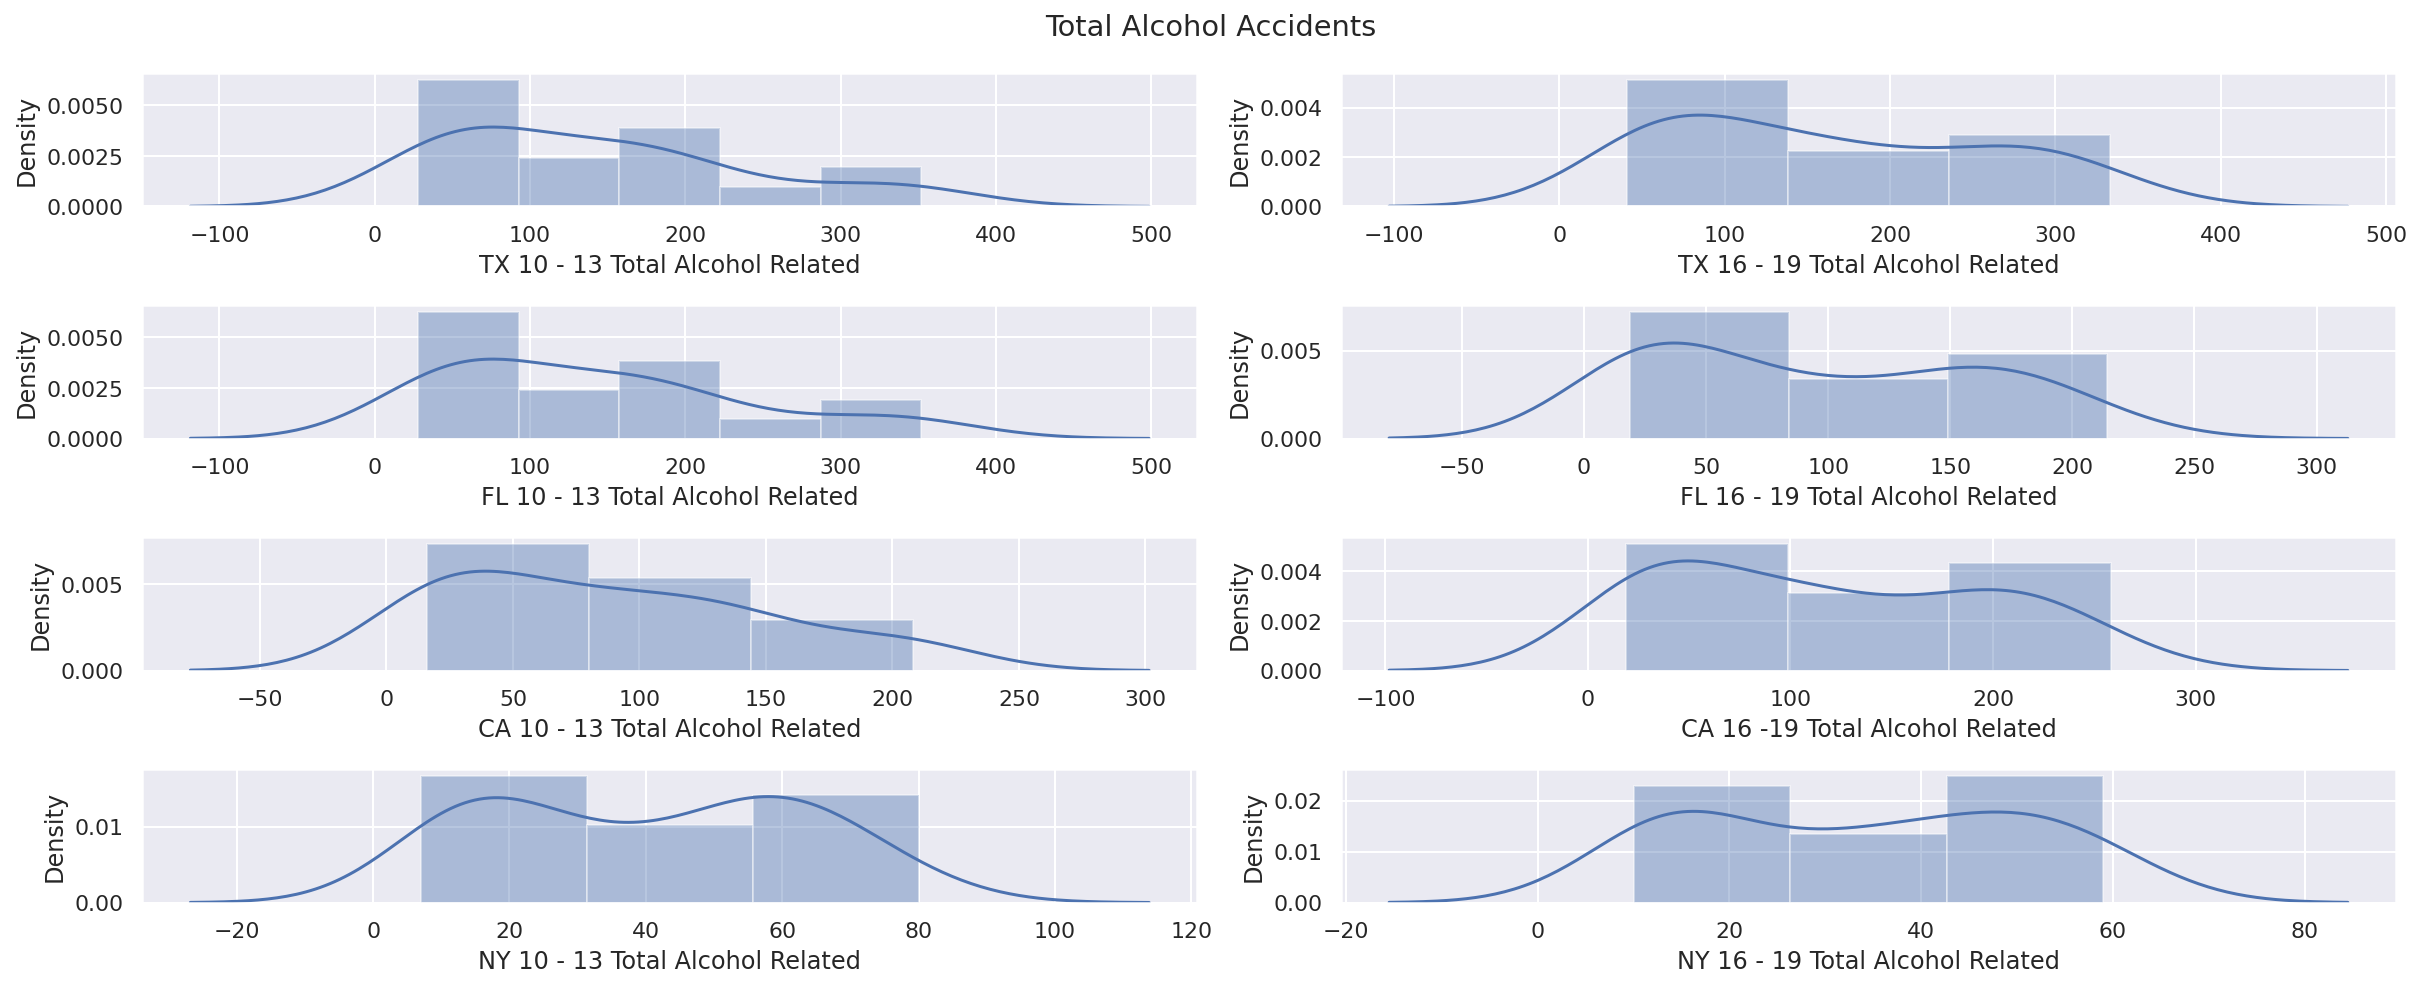

In [23]:
plt.subplot(4, 2, 1)
sns.distplot(df_TX10_13_TOD['Total Alcohol Related'])
plt.xlabel('TX 10 - 13 Total Alcohol Related')

plt.subplot(4, 2, 2)
sns.distplot(df_TX16_19_TOD['Total Alcohol Related'])
plt.xlabel('TX 16 - 19 Total Alcohol Related')

plt.subplot(4, 2, 3)
sns.distplot(df_TX10_13_TOD['Total Alcohol Related'])
plt.xlabel('FL 10 - 13 Total Alcohol Related')

plt.subplot(4, 2, 4)
sns.distplot(df_FL16_19_TOD['Total Alcohol Related'])
plt.xlabel('FL 16 - 19 Total Alcohol Related')

plt.subplot(4, 2, 5)
sns.distplot(df_CA10_13_TOD['Total Alcohol Related'])
plt.xlabel('CA 10 - 13 Total Alcohol Related')

plt.subplot(4, 2, 6)
sns.distplot(df_CA16_19_TOD['Total Alcohol Related'])
plt.xlabel('CA 16 -19 Total Alcohol Related')

plt.subplot(4, 2, 7)
sns.distplot(df_NY10_13_TOD['Total Alcohol Related'])
plt.xlabel('NY 10 - 13 Total Alcohol Related')

plt.subplot(4, 2, 8)
sns.distplot(df_NY16_19_TOD['Total Alcohol Related'])
plt.xlabel('NY 16 - 19 Total Alcohol Related')

plt.suptitle('Total Alcohol Accidents')
plt.tight_layout()

outcome = beta0 + (beta1)(predictor)

This visualization shows the probability for the amount of alcohol related accidents that occur in a given timeframe and for a given state. The conclusions that we can draw from this visualization is consistent with what we found from the others: the introduction of ride share services has actually increased the amount of accidents. This can be seen by the regression lines shown, since the lines from the time frames before ride-sharing are unimodal and have a tail towards the higher accident ranges whereas the regression lines from the time frames after ride-sharing have are bimodal and have a second peak where the tails on the ones before would be.

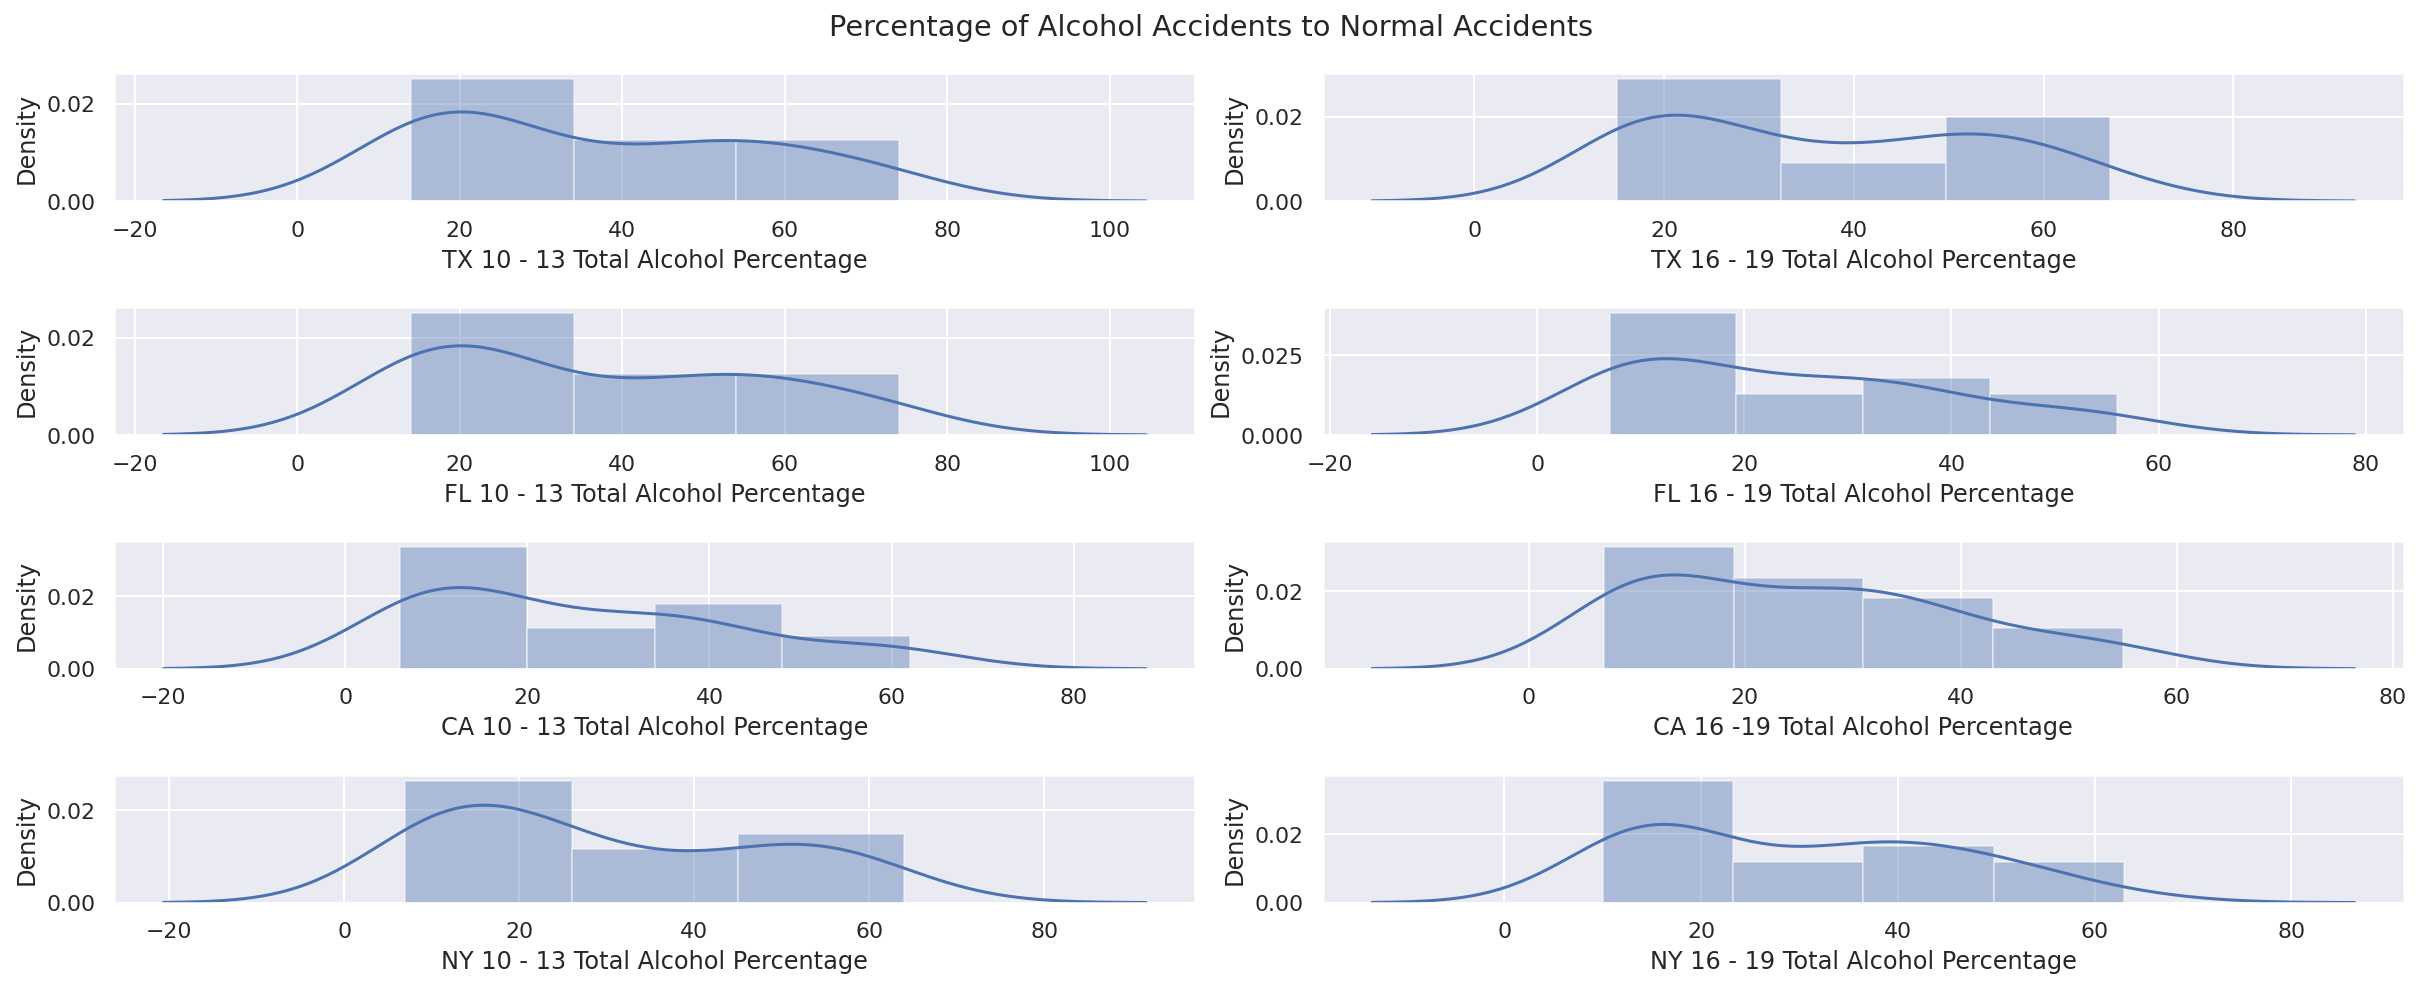

In [24]:
plt.subplot(4, 2, 1)
sns.distplot(df_TX10_13_TOD['Total Alcohol Percentage'])
plt.xlabel('TX 10 - 13 Total Alcohol Percentage')

plt.subplot(4, 2, 2)
sns.distplot(df_TX16_19_TOD['Total Alcohol Percentage'])
plt.xlabel('TX 16 - 19 Total Alcohol Percentage')

plt.subplot(4, 2, 3)
sns.distplot(df_TX10_13_TOD['Total Alcohol Percentage'])
plt.xlabel('FL 10 - 13 Total Alcohol Percentage')

plt.subplot(4, 2, 4)
sns.distplot(df_FL16_19_TOD['Total Alcohol Percentage'])
plt.xlabel('FL 16 - 19 Total Alcohol Percentage')

plt.subplot(4, 2, 5)
sns.distplot(df_CA10_13_TOD['Total Alcohol Percentage'])
plt.xlabel('CA 10 - 13 Total Alcohol Percentage')

plt.subplot(4, 2, 6)
sns.distplot(df_CA16_19_TOD['Total Alcohol Percentage'])
plt.xlabel('CA 16 -19 Total Alcohol Percentage')

plt.subplot(4, 2, 7)
sns.distplot(df_NY10_13_TOD['Total Alcohol Percentage'])
plt.xlabel('NY 10 - 13 Total Alcohol Percentage')

plt.subplot(4, 2, 8)
sns.distplot(df_NY16_19_TOD['Total Alcohol Percentage'])
plt.xlabel('NY 16 - 19 Total Alcohol Percentage')

plt.suptitle('Percentage of Alcohol Accidents to Normal Accidents')
plt.tight_layout()

This visualization shows the probability for the ratio of alcohol related incidents to total accidents  that occur in a given timeframe and for a given state. The conclusions that we can draw from this visualization is consistent with what we found from the others: the introduction of ride share services has actually increased the amount of accidents. This can be seen by the regression lines shown, since the lines from the time frames before ride-sharing are unimodal and have a tail towards the higher accident ranges whereas the regression lines from the time frames after ride-sharing have are bimodal and have a second peak where the tails on the ones before would be. This shows that it is more likely for their to be higher percentage of alcohol related accidents in these later years than the prior ones.

# Ethics & Privacy

The crash & report datasets found are publicly available through the United States Department of Transportation. There are no names or specific situations stated in the datasets rather it’s a summarization of the incidents that happened given the specific year. These datasets found are from 4 of the largest regions in the U.S such as California, Texas, New York, and Florida. The secrecy of the individuals involved is kept to ensure confidentiality. We used a source from Uber Under the Hood which was used to guide us through our thought process. The article uses clear evidence supporting our hypothesis and we have taken that into account in order to better depict our results. 

Because we respect the privacy of every individual, we will not use any personally identifiable data within any of our datasets to avoid exposing someone. We believe this question does not appear to violate any ethical claims and seems straightforward in the way we gather data. We will only be referring to users with the usernames they have for their accounts on the data regarding reviews.

For the purpose of this project, we used generalized datasets that are publicly available and do not include any personally identifiable information. Our main source of data, the United States Department of Transportation, works closely with the Federal Trade Commission to ensure the protection of consumers’ privacy. 
We also found that there might be a potential bias given that Uber is generally new and is used mainly by younger generations. The older generations have been accustomed to calling cabs as a way of safe transportation while intoxicated. Uber has yet to reach this age group as there are still cab companies operating in cities. Though we are confident in our findings as we compare and contrast data from before and after Uber's launch. Doing so would accurately explain the ways that Uber has impacted drunk driving avoidance in recent years.   



# Conclusion & Discussion

Given the information we obtained, we saw an interesting dynamic occur between the years that ride-sharing apps were gaining fame and popularity and the number of drunk driving accidents within CA, FL, NY, and TX. In our study, we saw how the relationship between the two unfolded both before and after the ride-sharing apps became industry giants. After conducting our exploratory data analysis, we were able to conclude that ride-sharing apps had no real effect on the number of alcohol related accidents. Not only did it not affect it, we actually saw an increase in the number of drunk driving accidents; this was not likely due to the ride-sharing apps but rather a more prominent confounding variable. Additionally, it was quite apparent that the time that most accidents occurred were well within the dead of night, ranging from around 6PM-3AM, the times people are more than likely to be drunk and should use a ride-sharing app instead of driving. The results appear to end on a somber note because of the increase in total drunk driving accidents, but that does not mean we cannot aim to improve this type of lifestyle and slowly move away from it.

We acknowledge the limitations of these datasets as not all alcohol-related vehicle incidents may be officially recorded leading to underreporting and slight inaccuracies. Additionally, we were unfortunately unable to find datasets regarding observations of Uber’s popularity between 2010-2019, therefore leading to the possibility of confounding variables in our conclusion. It would have been helpful to find data related to Uber’s revenue and usage changes within our chosen time spans in order to include a more explicit popularity variable and draw more precise comparisons with less potential for confounds. As mentioned earlier, because we had such a small sample population, we also believe we got rather skewed data as opposed to being able to use data throughout all states, but we hope this is something someone else may be able to continue for us. 

We additionally wanted to depict the major differences between datasets from 2016 - 2019 and 2010 - 2013. Using the data at hand we were able to grab data from different states and time points. Though the time points were useful in a lot of ways, there were better ways of using this data that we had in mind. We could have used data from popular ridesharing apps such as Uber or Lyft having these datasets would have solidified our position. Though this data was out of our reach as Uber and Lyft have private data not available to the public. Although our results were not what we expected to see, if we as a society attempted to stop drinking and driving as a whole, we can all contribute to the safety of our communities in order to allow people to live without fear of incidents like these occurring. Maybe in the future, we can find different ways in which we can attempt to decrease the number of drunk driving accidents to give people the right to live another day.

# Acknowledgments

We would like to thank professor Fleischer, TA Tyler Chang, TA Mia Lucio for the advice given throughout the quarter. We really needed the guidance given in order to sway us onto the right path. We learned a great deal about data analysis and most importantly how to collaborate with each other to complete this project. Our group was able to communicate, seek help, and perform as a team. We were very interested in our results and enjoyed the entire process.  

# Team Contributions

Enrique Alvarado
* Communicated with Professor Fleischer 
* EDA
* Parsing data
* Video editing
* Graph building

Omar Bautista
* Web scraping
* Editing format 
* Proposal revision
* Worked on graph building  

Pedro Diaz
* Data cleaning 
* Thought about an analysis plan with Omar
* Proposal editing
* Linear regression analysis

Hanna Clemente
* Hypothesis
* Proposal revision
* Data, Ethics & Privacy
* Conclusion & Discussion
